# PyCaret이라는 AutoML패키지를 사용하여 모델링

<p> pycaret이라는 autoML라이브러리를 이용하여 모델링을 해보았습니다. <br>
    코드 몇 줄만 가지고 간단하게 모델링하고 하이퍼 파라미터까지 자동으로 튜닝할 수 있는 패키지입니다.<br>
    굉장히 훌륭한 라이브러리라 생각하여 소개합니다.</p>
    
###### 참고
- [dacon 심리성향 대회 코드공유]https://dacon.io/competitions/official/235647/codeshare/1701?page=1&dtype=recent&ptype=pub
- [pycaret — 코드 몇 줄로 머신러닝 모델 만들기]https://medium.com/@john_analyst/pycaret-%EC%BD%94%EB%93%9C-%EB%AA%87-%EC%A4%84%EB%A1%9C-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-18a8de4b6024
- [pycaret 공식 홈페이지] https://pycaret.org/

먼저 pycaret 라이브러리를 설치해줍니다.

In [1]:
!pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## For reusable
random_state = 475

## 유용한 list 정의

계속해서 사용하는 list를 정의했습니다.

In [3]:
# Useful list

info = ["SEX","EDUCATION","MARRIAGE","AGE"]
delay_n = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
bill_n = ["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
pay_n = ["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]

## 자료형 변경과 column 제거

데이터의 자료형과 쓰지 않는 column들을 제거하였습니다.

In [4]:
train = pd.read_csv("C:/Users/chowonjae/Desktop/내부 프로젝트/uci_creditcard-train-0.0-0.0 (1).csv")
test = pd.read_csv("C:/Users/chowonjae/Desktop/내부 프로젝트/uci_creditcard-test-0.0-0.0 (1).csv")

#Change the column name "default payment next month" -> "default"
train = train.rename(columns = {"default payment next month":"default"})
test = test.rename(columns = {"default payment next month":"default"})

train = train.drop("sep_idx", axis = 1)
train_drop_info = train.drop(info, axis = 1)

test = test.drop("sep_idx", axis = 1)

# Change Type

train["ID"] = train["ID"].astype(np.int)
train["SEX"] = train["SEX"].astype(np.int)
train["EDUCATION"] = train["EDUCATION"].astype(np.int)
train["MARRIAGE"] = train["MARRIAGE"].astype(np.int)
train["AGE"] = train["AGE"].astype(np.int)
train["default"] = train["default"].astype(np.int)
train[delay_n] = train[delay_n].astype(np.int)

test["ID"] = test["ID"].astype(np.int)
test["SEX"] = test["SEX"].astype(np.int)
test["EDUCATION"] = test["EDUCATION"].astype(np.int)
test["MARRIAGE"] = test["MARRIAGE"].astype(np.int)
test["AGE"] = test["AGE"].astype(np.int)
test["default"] = test["default"].astype(np.int)
test[delay_n] = test[delay_n].astype(np.int)

# Drop the column
train = train.drop("ID", axis = 1)
test = test.drop(["ID"], axis = 1)

length = len(train)

In [5]:
print(train.shape)
print(test.shape)

(23996, 24)
(6004, 24)


In [6]:
## Split feature data and label data

X_train = train.drop(["default"], axis = 1)
y_train = train["default"]

X_test = test.drop(["default"], axis = 1)
y_test = test["default"]

In [7]:
print(X_train.shape)
print(X_test.shape)

(23996, 23)
(6004, 23)


## pycaret.classification 함수 불러오기

이 데이터는 0, 1로 나뉘어져있는 binary class 데이터입니다.<br>
따라서 binary classification 작업을 위해서 필요한 함수를 불러옵니다.

In [8]:
#classification을 위한 함수 불러오기

from pycaret.classification import *

## Setting up environment

- setup함수를 이용하여 모델 학습을 위해서 학습 환경을 설정해주어야 합니다.
- setup함수를 이용하면 자동으로 column 형태를 인식하고, 사용자에게 제대로 인식하였는지 묻습니다. 제대로 인식하였다면 enter를 누르시면 환경 설정이 끝납니다.
- 데이터에 결측치가 있다면 자동으로 결측을 매워줍니다. 이 데이터는 결측치가 없기 때문에 해당사항은 아닙니다.
- pycaret documentation을 보면 setup에 다양한 parameter들이 있습니다. 자신이 원하는 것이 있다면  입맛에 맞게 사용하시면 됩니다.
[https://pycaret.org/classification/] 이 문서를 참고하셔서 parameter들을 조정하시면 됩니다.

In [9]:
clf = setup(data = train, target = 'default')

,Description,Value
0,session_id,4495
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(23996, 24)"
5,Missing Values,False
6,Numeric Features,23
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## 모델 학습 및 비교

- compare_model 함수를 이용하여 모델을 학습하고 지정한 metric을 기준으로 정렬합니다.
- 이 데이터는 불균형한 데이터이기 때문에 accuracy를 사용하기 보단 AUC을 기준으로 정렬해 보았습니다.
- pycaret은 자동으로 10-folds cross validation을 진행합니다.

In [10]:
compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8169,0.7750,0.3641,0.6739,0.4725,0.3736,0.3996,1.7560
catboost,CatBoost Classifier,0.8152,0.7748,0.3670,0.6625,0.4721,0.3712,0.3951,15.5220
lightgbm,Light Gradient Boosting Machine,0.8147,0.7713,0.3673,0.6603,0.4716,0.3703,0.3939,0.1750
ada,Ada Boost Classifier,0.8128,0.7691,0.3148,0.6843,0.4308,0.3368,0.3733,0.4570
xgboost,Extreme Gradient Boosting,0.8075,0.7543,0.3546,0.6294,0.4534,0.3475,0.3687,1.3310
rf,Random Forest Classifier,0.8100,0.7515,0.3644,0.6372,0.4633,0.3582,0.3790,1.1830
et,Extra Trees Classifier,0.8054,0.7472,0.3654,0.6150,0.4583,0.3490,0.3666,0.7420
qda,Quadratic Discriminant Analysis,0.6046,0.7161,0.7317,0.3336,0.4565,0.2120,0.2525,0.0340
lda,Linear Discriminant Analysis,0.8084,0.7116,0.2569,0.7059,0.3764,0.2913,0.3436,0.0400
nb,Naive Bayes,0.4168,0.6635,0.8292,0.2557,0.3907,0.0703,0.1188,0.0190


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4495, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

- Gradient Boosting Classifier, CatBoost Classifier, Light Gradient Boosting Machine 의 AUC의 값이 가장 높은 것을 볼 수 있다.
- Accuracy와 F1-Score도 높은 것을 알 수 있다.

## 모델 생성

- 위의 모델중 AUC값이 가장 높은 모델 개를 선택해 모델을 생성합니다.

In [11]:
gbc = create_model('gbc')                       ## Gradient Boosting Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8179,0.7870,0.3641,0.6798,0.4742,0.3760,0.4029
1,0.8274,0.7850,0.4090,0.7014,0.5167,0.4203,0.4430
2,0.8226,0.7793,0.3694,0.7035,0.4844,0.3896,0.4191
3,0.8131,0.7787,0.3483,0.6633,0.4567,0.3568,0.3839
4,0.8185,0.7676,0.3404,0.7011,0.4583,0.3646,0.3990
5,0.8125,0.7869,0.3747,0.6455,0.4741,0.3697,0.3899
6,0.8119,0.7621,0.3483,0.6567,0.4552,0.3542,0.3802
7,0.8082,0.7542,0.3307,0.6443,0.4371,0.3356,0.3628
8,0.8100,0.7736,0.3492,0.6439,0.4528,0.3499,0.3739
9,0.8273,0.7752,0.4074,0.7000,0.5151,0.4188,0.4415


In [12]:
catboost = create_model('catboost')   ## CatBoost Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8179,0.7849,0.3720,0.6746,0.4796,0.3802,0.4050
1,0.8226,0.7896,0.3958,0.6849,0.5017,0.4030,0.4255
2,0.8244,0.7808,0.3879,0.7000,0.4992,0.4031,0.4290
3,0.8131,0.7742,0.3588,0.6570,0.4642,0.3626,0.3869
4,0.8167,0.7697,0.3509,0.6821,0.4634,0.3663,0.3957
5,0.8095,0.7857,0.3668,0.6347,0.4649,0.3590,0.3790
6,0.8071,0.7614,0.3456,0.6329,0.4471,0.3423,0.3653
7,0.8046,0.7602,0.3280,0.6263,0.4306,0.3263,0.3512
8,0.8106,0.7655,0.3492,0.6471,0.4536,0.3512,0.3757
9,0.8255,0.7756,0.4153,0.6856,0.5173,0.4185,0.4381


In [13]:
lgbm = create_model('lightgbm')           ## Light Gradient Boosting Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8119,0.7836,0.3694,0.6452,0.4698,0.3656,0.3866
1,0.8208,0.7789,0.4169,0.6639,0.5122,0.4094,0.4260
2,0.8238,0.7747,0.3799,0.7024,0.4932,0.3978,0.4253
3,0.8155,0.7727,0.3694,0.6635,0.4746,0.3735,0.3971
4,0.8185,0.7689,0.3509,0.6927,0.4658,0.3703,0.4014
5,0.8083,0.7805,0.3694,0.6278,0.4651,0.3578,0.3765
6,0.8065,0.7600,0.3430,0.6311,0.4444,0.3395,0.3627
7,0.8088,0.7534,0.3333,0.6462,0.4398,0.3384,0.3654
8,0.8052,0.7607,0.3360,0.6256,0.4372,0.3321,0.3556
9,0.8279,0.7799,0.4048,0.7051,0.5143,0.4189,0.4427


## 모델 튜닝

- tune_model를 사용하여 모델을 자동으로 튜닝합니다.
- hyperparameter를 직접 지정해 custom 튜닝도 진행할 수 있습니다.

In [14]:
gbc_tune = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8167,0.7771,0.3694,0.6699,0.4762,0.3761,0.4006
1,0.8208,0.7902,0.4142,0.6653,0.5106,0.4081,0.4252
2,0.8196,0.7721,0.3694,0.6863,0.4803,0.3828,0.4098
3,0.8143,0.7723,0.3694,0.6573,0.4730,0.3708,0.3935
4,0.8161,0.7586,0.3536,0.6768,0.4645,0.3664,0.3946
5,0.8048,0.7845,0.3588,0.6154,0.4533,0.3444,0.3630
6,0.8095,0.7558,0.3588,0.6385,0.4595,0.3547,0.3764
7,0.8029,0.7431,0.3254,0.6181,0.4263,0.3209,0.3450
8,0.8052,0.7645,0.3333,0.6269,0.4352,0.3306,0.3547
9,0.8267,0.7752,0.4127,0.6933,0.5174,0.4200,0.4410


In [15]:
catboost_tune = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8161,0.7881,0.3641,0.6699,0.4718,0.3720,0.3974
1,0.8292,0.7874,0.4090,0.7110,0.5193,0.4244,0.4485
2,0.8256,0.7841,0.3747,0.7172,0.4922,0.3992,0.4299
3,0.8149,0.7754,0.3536,0.6700,0.4629,0.3637,0.3909
4,0.8179,0.7610,0.3430,0.6952,0.4594,0.3647,0.3976
5,0.8125,0.7919,0.3668,0.6495,0.4688,0.3655,0.3875
6,0.8125,0.7608,0.3536,0.6569,0.4597,0.3584,0.3836
7,0.8130,0.7553,0.3307,0.6720,0.4433,0.3462,0.3777
8,0.8100,0.7737,0.3439,0.6468,0.4491,0.3470,0.3723
9,0.8291,0.7760,0.4074,0.7097,0.5176,0.4229,0.4469


In [16]:
lgbm_tune = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8137,0.7847,0.3536,0.6634,0.4613,0.3610,0.3872
1,0.8244,0.7859,0.4063,0.6875,0.5108,0.4123,0.4335
2,0.8238,0.7801,0.3826,0.7005,0.4949,0.3991,0.4259
3,0.8161,0.7780,0.3668,0.6683,0.4736,0.3734,0.3981
4,0.8196,0.7610,0.3377,0.7111,0.4580,0.3658,0.4024
5,0.8143,0.7808,0.3720,0.6558,0.4747,0.3722,0.3943
6,0.8131,0.7613,0.3536,0.6601,0.4605,0.3597,0.3854
7,0.8064,0.7502,0.3201,0.6402,0.4268,0.3256,0.3539
8,0.8112,0.7686,0.3413,0.6548,0.4487,0.3481,0.3751
9,0.8291,0.7809,0.3968,0.7177,0.5111,0.4177,0.4447


- gbc만 빼고 나머지 두 모델은 성능이 좋아진 것을 볼 수 있다.

## 앙상블

- blend_models 함수를 이용하여 앙상블을 진행할 수 있습니다.
- 위의 모델을 'soft voting'방식을 통해 앙상블을 진행했습니다.
- gbc는 모델은 튜닝 전 모델, 나머지 두 모델은 튜닝 후 모델을 사용하였습니다.

In [17]:
blended = blend_models(estimator_list = [gbc, catboost_tune, lgbm_tune], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8149,0.7887,0.3615,0.6650,0.4684,0.3680,0.3931
1,0.8280,0.7879,0.4037,0.7083,0.5143,0.4191,0.4436
2,0.8262,0.7837,0.3826,0.7143,0.4983,0.4046,0.4335
3,0.8161,0.7791,0.3562,0.6750,0.4663,0.3678,0.3953
4,0.8185,0.7652,0.3404,0.7011,0.4583,0.3646,0.3990
5,0.8143,0.7886,0.3773,0.6530,0.4783,0.3750,0.3959
6,0.8119,0.7639,0.3456,0.6583,0.4533,0.3527,0.3795
7,0.8106,0.7554,0.3254,0.6613,0.4362,0.3378,0.3686
8,0.8106,0.7747,0.3386,0.6531,0.4460,0.3453,0.3725
9,0.8291,0.7801,0.3995,0.7156,0.5127,0.4190,0.4452


## ROC Curve와 Precision-Recall Curve

- 두 그래프를 통해서 모델을 평가한다.

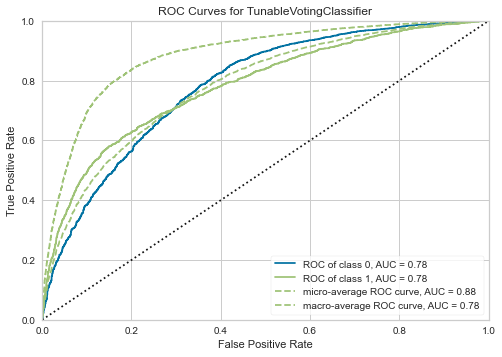

In [19]:
plot_model(estimator = blended,  plot = 'auc')

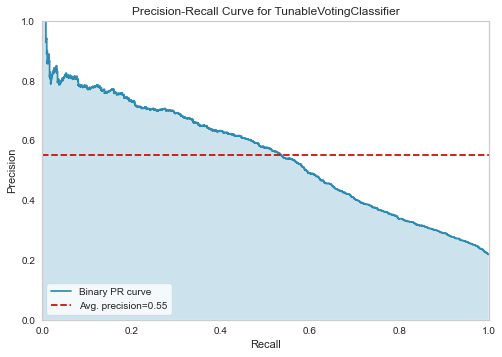

In [20]:
plot_model(blended, plot = 'pr')

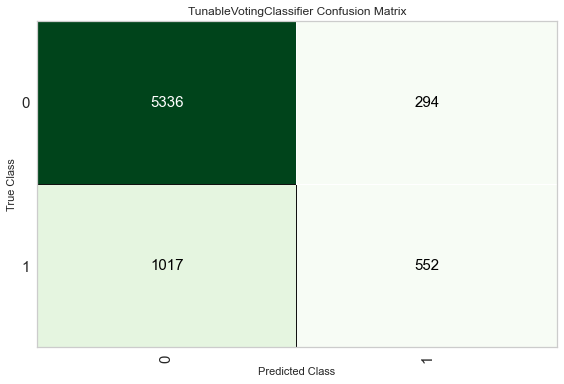

In [23]:
plot_model(blended, plot = 'confusion_matrix')

## 모델 예측

- 구축된 앙상블 모델을 통해 예측을 해보겠습니다.
- setup 환경에 이미 hold-out set이 존재하므로 해당 데이터에 대해 예측을 하여 모델 성능을 확인하겠습니다.

In [22]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8179,0.7824,0.3518,0.6525,0.4571,0.3593,0.3841


## 최종 모델 결정

- 현재까지는 모델을 평가하기 위해 train/val 로 나눠서 학습을 진행했습니다.
- 최적의 성능을 위해서 전체 데이터를 통해 학습하겠습니다.
- finalize_model을 통해서 최종 모델을 결정한 후 test데이터를 통해서 예측합니다.

In [24]:
final_model = finalize_model(blended)

In [25]:
predictions = predict_model(final_model, data = X_test)

## Predictions

- label에 예측값과 Score에 예측 확률이 저장되어 있습니다.

In [27]:
predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Label,Score
0,180000.0,1,3,1,43,-1,-1,-1,-1,-1,...,218.0,6690.0,15682.0,4699.0,238.0,218.0,6710.0,11949.0,0,0.8669
1,70000.0,2,2,1,31,0,0,0,0,0,...,69030.0,66791.0,2566.0,2775.0,2381.0,3000.0,2452.0,2608.0,0,0.8549
2,50000.0,2,2,2,22,0,0,2,0,0,...,27173.0,26424.0,4809.0,0.0,1200.0,1500.0,943.0,1142.0,0,0.8234
3,500000.0,1,2,2,30,1,0,0,0,0,...,46054.0,34290.0,5037.0,47221.0,5026.0,16005.0,2000.0,1000.0,0,0.9175
4,200000.0,2,1,2,33,-1,-1,-1,-1,-2,...,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0,0.7591


## test데이터의 score 측정

- precision, recall, f1-score, accuracy값을 산출하는 함수를 지정했습니다.

In [28]:
def f1_score(y_true, y_pred):
    
    true_positive_mask = np.logical_and((y_true == 1), (y_pred == 1))
    true_negative_mask = np.logical_and((y_true == 0), (y_pred == 0))
    condition_positive = (y_true == 1)
    predicted_positive = (y_pred == 1)
    
    precision = np.sum(true_positive_mask) / np.sum(predicted_positive)
    recall = np.sum(true_positive_mask) / np.sum(condition_positive)
    
    f1 = 2 * (precision * recall) / (precision + recall)
    
    acc = (np.sum(true_positive_mask) + np.sum(true_negative_mask)) / len(y_true)
    
    return precision, recall, f1, acc

In [31]:
precision, recall, f1, accuracy = f1_score(y_test, predictions['Label'])
print("\033[35mPrecision\033[30m: {:.2f}, \033[35mRecall\033[30m: {:.2f}, \033[35mF1-Score\033[30m: {:.2f}, \033[35mAccuracy\033[30m: {:.2f}".format(precision, recall, f1, accuracy))

Precision: 0.71, Recall: 0.39, F1-Score: 0.50, Accuracy: 0.83


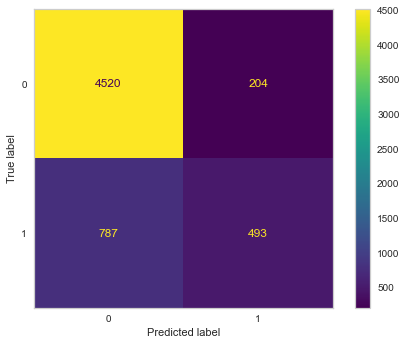

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,predictions['Label'])
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.show()